In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    test_indices = k_indices[k]
    y_test = y[test_indices]
    y_train = np.delete(y,test_indices)
    
    x_test = x[test_indices]
    x_train = np.delete(x,test_indices)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    tx_test = build_poly(x_test,degree)
    tx_train = build_poly(x_train,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w, loss_tr = ridge_regression(y_train,tx_train,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_te = compute_mse(y_test, tx_test,w)
    return loss_tr, loss_te

In [5]:
a = np.array([1,2,3])
ind = [1]
print(a)
print(np.delete(a,ind))

[1 2 3]
[1 3]


0.004520353656360241


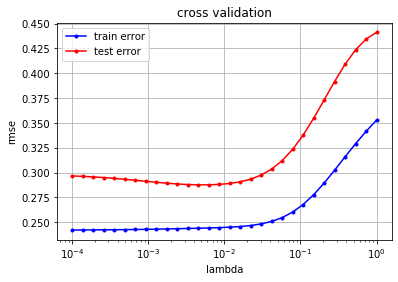

In [12]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lambda_ in lambdas:
        s_loss_tr, s_loss_te = 0,0
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y,x, k_indices, k, lambda_, degree)
            s_loss_te += np.sqrt(2*loss_te) # convert to RMSE 
            s_loss_tr += np.sqrt(2*loss_tr) # convert to RMSE
        s_loss_te /= k_fold # avg the loss 
        s_loss_tr /= k_fold
        rmse_tr.append(s_loss_tr)
        rmse_te.append(s_loss_te)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
    lambda_min_index = np.argmin(rmse_te)
    lambda_opt = lambdas[lambda_min_index]
    print(lambda_opt)
    return rmse_tr,rmse_te
rmse_tr, rmse_te =cross_validation_demo()

{'whiskers': [<matplotlib.lines.Line2D at 0x20fe060aac8>,
 'caps': [<matplotlib.lines.Line2D at 0x20fe05eec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fe061d148>],
 'medians': [<matplotlib.lines.Line2D at 0x20fe064e748>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fe0641f88>],
 'means': []}

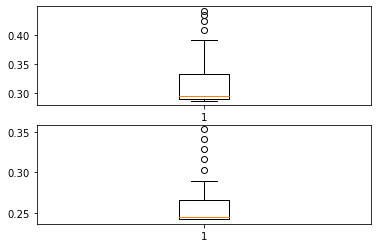

In [23]:
#boxplot
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.boxplot(rmse_te)
ax2 = fig.add_subplot(2,1,2)
ax2.boxplot(rmse_tr)


### determine best degree



7


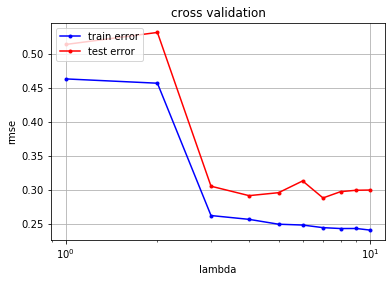

In [44]:
def cross_validation_demo():
    seed = 1
    degrees = [1,2,3,4,5,6,7,8,9,10]
    k_fold = 4
    lambda_ = 0.00452
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for degree in degrees:
        s_loss_tr, s_loss_te = 0,0
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y,x, k_indices, k, lambda_, degree)
            s_loss_te += np.sqrt(2*loss_te) # convert to RMSE 
            s_loss_tr += np.sqrt(2*loss_tr) # convert to RMSE
        s_loss_te /= k_fold # avg the loss 
        s_loss_tr /= k_fold
        rmse_tr.append(s_loss_tr)
        rmse_te.append(s_loss_te)
    cross_validation_visualization(degrees, rmse_tr, rmse_te)
    
    d_min_index = np.argmin(rmse_te)
    d_opt = degrees[d_min_index]
    print(d_opt)
cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

(100, 9)


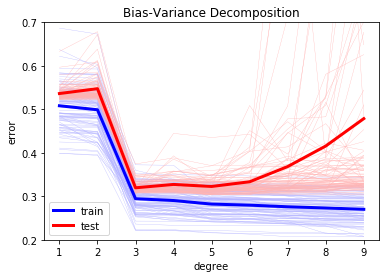

In [48]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    print(rmse_tr.shape)
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for degree_index,degree in enumerate(degrees):
            tx_train, y_train, tx_test, y_test = split_data(x,y,ratio_train,seed)
            tx_test = build_poly(tx_test,degree)
            tx_train = build_poly(tx_train,degree)
            w, loss_tr = least_squares(y_train,tx_train)
            loss_te = compute_mse(y_test, tx_test,w)

            rmse_tr[index_seed,degree_index] = np.sqrt(2*loss_tr)
            rmse_te[index_seed,degree_index] = np.sqrt(2*loss_te)

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
    return rmse_tr, rmse_te

rmse_tr, rmse_te = bias_variance_demo()

(0.2, 0.6)

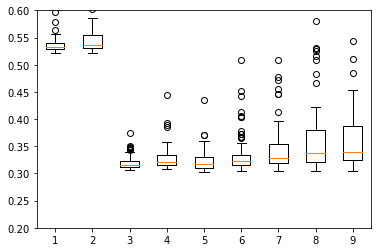

In [64]:
plot = plt.boxplot(rmse_te)
plt.ylim(0.2,0.6)

In [76]:
def determine_optimal_lambda(y,x,k_fold,seed,degree):
    # determine the hyperparam by performing grid search using cross-validation on the trainset
    k_indices = build_k_indices(y, k_fold, seed)
    lambdas = np.logspace(-4, 0, 30)
    for (lambda_index,lambda_) in enumerate(lambdas):
        # define lists to store the loss of training data and test data
        rmse_tr = []
        s_loss_tr = 0
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y,x, k_indices, k, lambda_, degree)
            s_loss_tr += np.sqrt(2*loss_tr) # convert to RMSE
        rmse_tr.append(s_loss_tr/k_fold)

        lambda_min_index = np.argmin(rmse_tr)
        lambda_opt = lambdas[lambda_min_index]
    return lambda_opt

(100, 9)


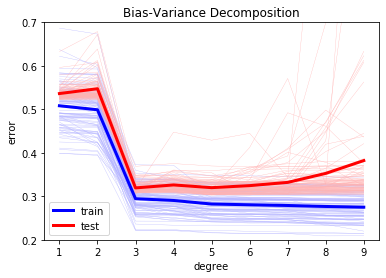

In [83]:
seeds = range(100)
num_data = 10000
ratio_train = 0.005
degrees = range(1, 10)
rmse_tr = np.empty((len(seeds), len(degrees)))
rmse_te = np.empty((len(seeds), len(degrees)))
print(rmse_tr.shape)
for index_seed, seed in enumerate(seeds):
    np.random.seed(seed)
    x = np.linspace(0.1, 2 * np.pi, num_data)
    y = np.sin(x) + 0.3 * np.random.randn(num_data).T
    
    for degree_index,degree in enumerate(degrees):
        # split dataset
        tx_train, y_train, tx_test, y_test = split_data(x,y,ratio_train,seed)
        # determine hyperparams by performing gridsearch on trainset
        lambda_opt = determine_optimal_lambda(y_train, tx_train, 4, seed, degree)
        # train model on trainset using optimal hyperparams
        tx_train = build_poly(tx_train,degree)
        w, loss_tr = ridge_regression(y_train,tx_train,lambda_opt)
        # make predictions & compute loss on test set
        tx_test = build_poly(tx_test,degree)
        loss_te = compute_mse(y_test, tx_test,w)
        
        rmse_tr[index_seed,degree_index] = np.sqrt(2*loss_tr)
        rmse_te[index_seed,degree_index] = np.sqrt(2*loss_te)

bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)


### least squares
variance increases as complexity goes up (overfitting), this can be seen by the huge divergence of the errors of the different dataset instances. Bias was huge at first bc of underfitting but decreases as complexity increases. 

### ridge regression
Grosso modo same curves BUT variance of the test set stays way lower (and so does overal error). --> **Better generalization**
This is bc the lambda that punishes overfitting and hence manages to deal better with the increasing model complexity.